# Linear Search part

n=1000, average lookup time=0.00004249 s
n=10000, average lookup time=0.00037111 s
n=100000, average lookup time=0.00379062 s
n=1000000, average lookup time=0.03774443 s
n=10000000, average lookup time=0.39013438 s


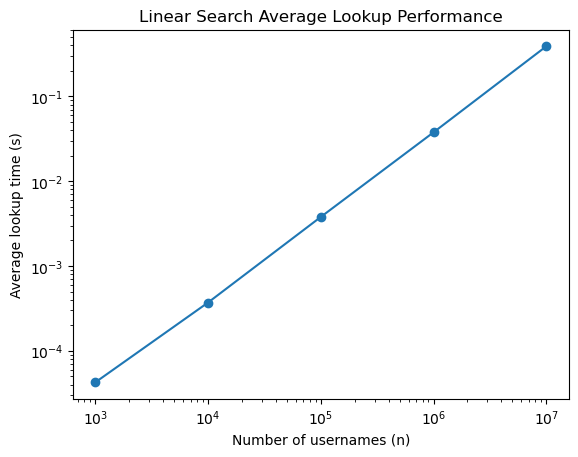

In [ ]:
# Import necessary libraries
from random import choice, sample
from string import ascii_lowercase, digits
import matplotlib.pyplot as plt
import time

chars = ascii_lowercase + digits # random usernames
n_list_linear = [10**3, 10**4, 10**5, 10**6, 10**7]   # The list of n's (number of usernames) we will search through
times_linear = []

for n in n_list_linear:
    # generate random usernames
    usernames = [''.join(choice(chars) for _ in range(5)) + str(i) for i in range(n)]
    
    number = 1000 # Number of usernames you want to search
    lookups = min(number//2, len(usernames)) # number will either be half OR the total length of the usernames
    negative_samples = number - lookups # number of usernames to search NOT present (some usernames to search won't be present, and it doesn't matter, we just want to search)

    lookup_names = []
    lookup_names.extend(sample(usernames, lookups)) # the usernames to search
    lookup_names.extend([''.join(choice(chars) for _ in range(5)) for _ in range(negative_samples)]) # adding the names not present

    start_time = time.perf_counter_ns() # start recording time
    for name in lookup_names:
        for u in usernames:   # linear search through lookup_names
            if u == name:
                break # when found, break
    total_time = time.perf_counter_ns() - start_time # end time of search of total names

    avg_time_sec = (total_time / len(lookup_names)) / 1e9 # divide total time by no. of usernames to find the average lookup time in seconds
    times_linear.append(avg_time_sec) # append it to the list of times for each n

    print(f"n={n}, average lookup time={avg_time_sec:.8f} s")

# Plot the graph of n vs time
plt.plot(n_list_linear, times_linear, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average lookup time (s)")
plt.title("Linear Search Average Lookup Performance")
plt.savefig("D:/HAMZA/1.UBC Ok/2-WT1 2025 (Sep-Dec 2025)/COSC 520 - Advanced Algorithms/Assignments/Ass.1 520/COSC-520-Assignment-1/Plots/Linear_search.png", dpi=300)
plt.show()

# Binary Search

n=1000, avg lookup time=0.000002792 s
n=10000, avg lookup time=0.000002777 s
n=100000, avg lookup time=0.000003778 s
n=1000000, avg lookup time=0.000007953 s
n=10000000, avg lookup time=0.000011094 s


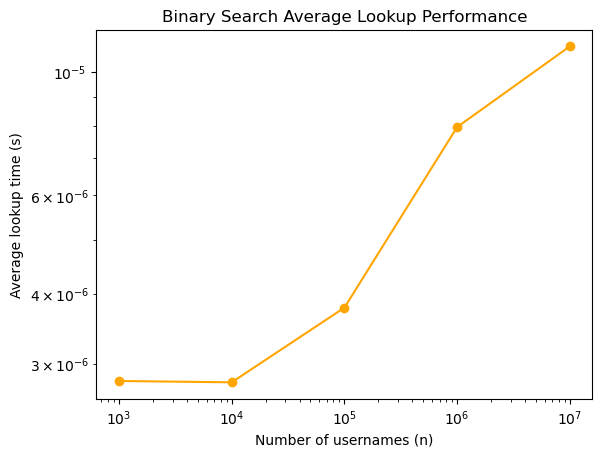

In [ ]:
from random import choice, sample
from string import ascii_lowercase, digits
import matplotlib.pyplot as plt
import time

chars = ascii_lowercase + digits # random usernames
n_list_binary = [10**3, 10**4, 10**5, 10**6, 10**7]   # The list of n's (number of usernames) we will search through
times_binary = []

def binary_search(sorted_list, target):
    """
    Binary search function. Does the same as bisect.bisect_left.
    Goes to the middle of an array, sees if target is on the left or right (or middle), and bisects it continuously until the target is found
    """
    left, right = 0, len(sorted_list) - 1
    while left <= right:
        mid = (left + right) // 2
        if sorted_list[mid] == target:
            return True
        elif sorted_list[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return False

for n in n_list_binary:
    # Generate usernames
    usernames = [''.join(choice(chars) for _ in range(5)) + str(i) for i in range(n)]

    usernames.sort()  # sorting is required for binary search

    number = 1000 # Number of usernames you want to search
    lookups = min(number//2, len(usernames)) # number will either be half OR the total length of the usernames
    negative_samples = number - lookups # number of usernames to search NOT present (some usernames to search won't be present, and it doesn't matter, we just want to search)

    lookup_names = []
    lookup_names.extend(sample(usernames, lookups)) # the usernames to search
    lookup_names.extend([''.join(choice(chars) for _ in range(5)) for _ in range(negative_samples)]) # adding the names not present

    # Time multiple lookups
    start_time = time.perf_counter_ns()
    for name in lookup_names:
        binary_search(usernames, name)
    total_time = time.perf_counter_ns() - start_time

    avg_time_sec = (total_time / len(lookup_names)) / 1e9 # divide total time by no. of usernames to find the average lookup time in seconds
    times_binary.append(avg_time_sec)

    print(f"n={n}, avg lookup time={avg_time_sec:.9f} s")

# Plot the graph of n vs time
plt.plot(n_list_binary, times_binary, marker='o', color='orange')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average lookup time (s)")
plt.title("Binary Search Average Lookup Performance")
plt.savefig("D:/HAMZA/1.UBC Ok/2-WT1 2025 (Sep-Dec 2025)/COSC 520 - Advanced Algorithms/Assignments/Ass.1 520/COSC-520-Assignment-1/Plots/Binary_search.png", dpi=300)
plt.show()


# Hashing

## Python Set (C optimized)

n=100000, found=True, time=0.0000000000000000s
n=1000000, found=True, time=0.0000000000000000s
n=10000000, found=True, time=0.0000000000000000s
n=100000000, found=True, time=0.0000000000000000s


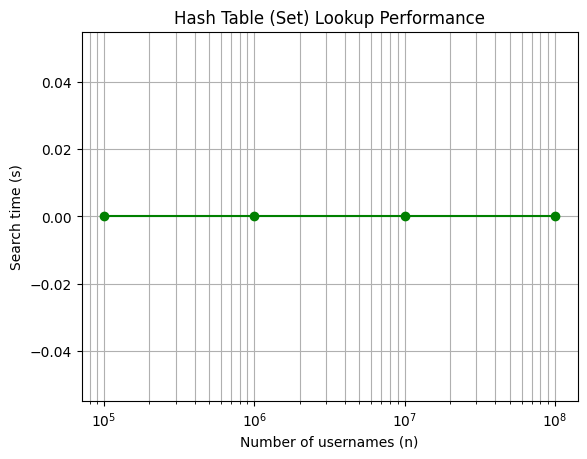

In [ ]:
from random import choice
from string import ascii_lowercase, digits
import matplotlib.pyplot as plt
import time

chars = ascii_lowercase + digits
find_username = 'hamza'
n_list = [10**5, 10**6, 10**7, 10**8]   # scale gradually
times = []

for n in n_list:
    # Generate usernames
    usernames = [''.join(choice(chars) for _ in range(5)) + str(i) for i in range(n-1)]
    usernames.append(find_username)

    # Store in a hash table (Python set)
    usernames_set = set(usernames)

    # Time lookup
    start_time = time.perf_counter_ns()
    found = (find_username in usernames_set)   # O(1) average
    times.append(time.perf_counter_ns() - start_time)

    print(f"n={n}, found={found}, time={times[-1]:.16f}s")

# Plot
plt.plot(n_list, times, marker='o', color='green')
plt.xscale('log')              # make x-axis logarithmic
plt.grid(True, which="both")   # grid for both major & minor ticks
plt.xlabel("Number of usernames (n)")
plt.ylabel("Search time (s)")
plt.title("Hash Table (Set) Lookup Performance")
plt.show()


## SHA 256 (Ran for > 1hr so I stopped it)

In [ ]:
import hashlib
from random import choice
from string import ascii_lowercase, digits
import matplotlib.pyplot as plt
import time

# Convert a string to an integer index using SHA-256
def sha256_hash(s, table_size):
    h = hashlib.sha256(s.encode()).hexdigest()
    return int(h, 16) % table_size

class HashTable:
    def __init__(self, size=10**6):
        self.size = size
        self.table = [[] for _ in range(size)]

    def insert(self, key):
        idx = sha256_hash(key, self.size)
        if key not in self.table[idx]:  # avoid duplicates
            self.table[idx].append(key)

    def search(self, key):
        idx = sha256_hash(key, self.size)
        return key in self.table[idx]

# ---- Experiment ----
chars = ascii_lowercase + digits
find_username = 'hamza'
n_list = [10**5, 10**6, 10**7, 10**8]   # scale cautiously
times = []

for n in n_list:
    ht = HashTable(size=2*n)  # load factor ~0.5

    # Generate usernames
    usernames = [''.join(choice(chars) for _ in range(5)) + str(i) for i in range(n-1)]
    usernames.append(find_username)

    # Insert into hash table
    for name in usernames:
        ht.insert(name)

    # Time lookup
    start_time = time.perf_counter_ns()
    found = ht.search(find_username)
    times.append(time.perf_counter_ns() - start_time)

    print(f"n={n}, found={found}, time={times[-1]:.16f}s")

# Plot
plt.plot(n_list, times, marker='o', color='red')
plt.xlabel("Number of usernames (n)")
plt.ylabel("Search time (s)")
plt.title("Hash Table Lookup with SHA-256")
plt.show()

n=100000, found=True, time=0.0000000000000000s
n=1000000, found=True, time=0.0000000000000000s
n=10000000, found=True, time=0.0000000000000000s


## MurmurHash (New)

n=1000, avg lookup time=0.000000773 s
n=10000, avg lookup time=0.000000641 s
n=100000, avg lookup time=0.000000818 s
n=1000000, avg lookup time=0.000000871 s
n=10000000, avg lookup time=0.000001561 s


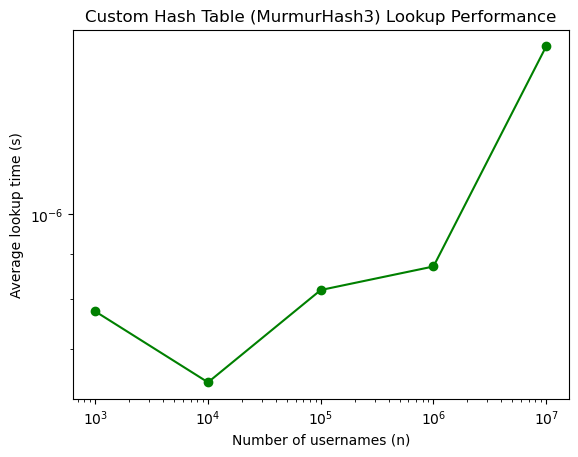

In [ ]:
import mmh3
from random import choice, sample
from string import ascii_lowercase, digits
import matplotlib.pyplot as plt
import time

# Simple hash table using MurmurHash3 + chaining
# Using MurmurHash3 for hashing. It is non-cryptographic so it's faster and security is not needed for this assignment's purpose.
# Tried SHA-256 but it was taking too long
class HashTable:
    def __init__(self, size=10**6):
        # Initialize table with empty lists for chaining
        self.size = size
        self.table = [[] for _ in range(size)]

    def _hash(self, key):
        # Compute hash index using MurmurHash3
        return mmh3.hash(key) % self.size

    def insert(self, key):
        # Insert key if not already present in the chain
        idx = self._hash(key)
        if key not in self.table[idx]:
            self.table[idx].append(key)

    def contains(self, key):
        # Check if key exists in the hash table
        idx = self._hash(key)
        return key in self.table[idx]

# Parameters
chars = ascii_lowercase + digits
n_list_hash = [10**3, 10**4, 10**5, 10**6, 10**7] # test sizes
times_hash = []

for n in n_list_hash:
    # Generate usernames (5 random characters + unique number)
    usernames = [''.join(choice(chars) for _ in range(5)) + str(i) for i in range(n)]

    # Build hash table of size ~2n to reduce collisions
    ht = HashTable(size=2 * n)
    for name in usernames:
        ht.insert(name)

    # Decide how many lookups to perform (based on smallest n)
    number = 1000 
    lookups = min(number//2, len(usernames))
    negative_samples = number - lookups

    # Build lookup set: mix of existing and non-existing usernames
    lookup_names = []
    lookup_names.extend(sample(usernames, lookups))
    lookup_names.extend([''.join(choice(chars) for _ in range(5)) for _ in range(negative_samples)])

    # Time multiple lookups
    start_time = time.perf_counter_ns()
    for name in lookup_names:
        ht.contains(name)
    total_time = time.perf_counter_ns() - start_time

    # Compute average lookup time (convert from ns to seconds)
    avg_time_sec = (total_time / len(lookup_names)) / 1e9
    times_hash.append(avg_time_sec)

    print(f"n={n}, avg lookup time={avg_time_sec:.9f} s")

# Plot results n vs. time
plt.plot(n_list_hash, times_hash, marker='o', color='green')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average lookup time (s)")
plt.title("Custom Hash Table (MurmurHash3) Lookup Performance")
plt.savefig("D:/HAMZA/1.UBC Ok/2-WT1 2025 (Sep-Dec 2025)/COSC 520 - Advanced Algorithms/Assignments/Ass.1 520/COSC-520-Assignment-1/Plots/Hash_Table.png", dpi=300)
plt.show()


# Bloom Filter

## New (MurmurHash)

n=1000, avg lookup time=0.000003313 s (sampled 1000 usernames)
n=10000, avg lookup time=0.000003044 s (sampled 1000 usernames)
n=100000, avg lookup time=0.000002413 s (sampled 1000 usernames)
n=1000000, avg lookup time=0.000003408 s (sampled 1000 usernames)
n=10000000, avg lookup time=0.000003800 s (sampled 1000 usernames)


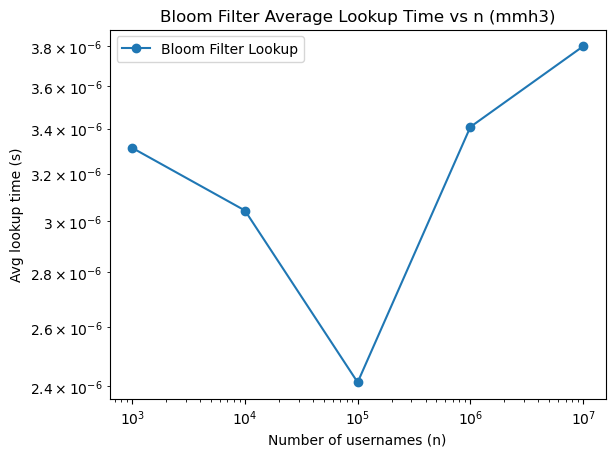

In [ ]:
import mmh3, time, random
from string import ascii_lowercase, digits
from bitarray import bitarray
import matplotlib.pyplot as plt
import numpy as np

# Using MurmurHash3 for both hashing functions
class BloomFilter:
    def __init__(self, size=1000000, hash_count=5):
        self.size = size
        self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)

    def _hashes(self, item):
        # mmh3 returns 32-bit signed int, take abs to avoid negatives
        return [(abs(mmh3.hash(item, i)) % self.size) for i in range(self.hash_count)]

    # inserting a username
    def add(self, item):
        for index in self._hashes(item):
            self.bit_array[index] = 1

    # checking if a username exists
    def check(self, item):
        return all(self.bit_array[index] for index in self._hashes(item))


chars = ascii_lowercase + digits
n_list_bloom = [10**3, 10**4, 10**5, 10**6, 10**7]  # list of username numbers to add 
times_bloom = []

for n in n_list_bloom:
    # Generate usernames
    usernames = [''.join(random.choice(chars) for _ in range(5)) + str(i) for i in range(n)]

    # Create Bloom filter
    bf = BloomFilter(size=n*10, hash_count=5)

    # Add all usernames
    for name in usernames:
        bf.add(name)

    number = 1000 # Number of usernames you want to search
    lookups = min(number//2, len(usernames)) # number will either be half OR the total length of the usernames
    negative_samples = number - lookups # number of usernames to search NOT present (some usernames to search won't be present, and it doesn't matter, we just want to search)

    lookup_names = []
    lookup_names.extend(sample(usernames, lookups)) # the usernames to search
    lookup_names.extend([''.join(choice(chars) for _ in range(5)) for _ in range(negative_samples)]) # adding the names not present

    # Time lookups
    start = time.perf_counter_ns()
    for u in lookup_names:
        _ = bf.check(u)
    end = time.perf_counter_ns()

    avg_time = ((end - start) / number) / 1e9 # Find average time of a lookup
    times_bloom.append(avg_time)

    print(f"n={n}, avg lookup time={avg_time:.9f} s (sampled {number} usernames)")

# Plot Results of times taken to search an entry using a Bloom Filter
plt.plot(n_list_bloom, times_bloom, marker="o", label="Bloom Filter Lookup")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of usernames (n)")
plt.ylabel("Avg lookup time (s)")
plt.title("Bloom Filter Average Lookup Time vs n (mmh3)")
plt.legend()
plt.savefig("D:/HAMZA/1.UBC Ok/2-WT1 2025 (Sep-Dec 2025)/COSC 520 - Advanced Algorithms/Assignments/Ass.1 520/COSC-520-Assignment-1/Plots/Bloom_Filter.png", dpi=300)
plt.show()

# Cuckoo Filter

n=1000, avg lookup time=0.000002871 s
n=10000, avg lookup time=0.000002938 s
n=100000, avg lookup time=0.000003144 s
n=1000000, avg lookup time=0.000003283 s
n=10000000, avg lookup time=0.000004034 s


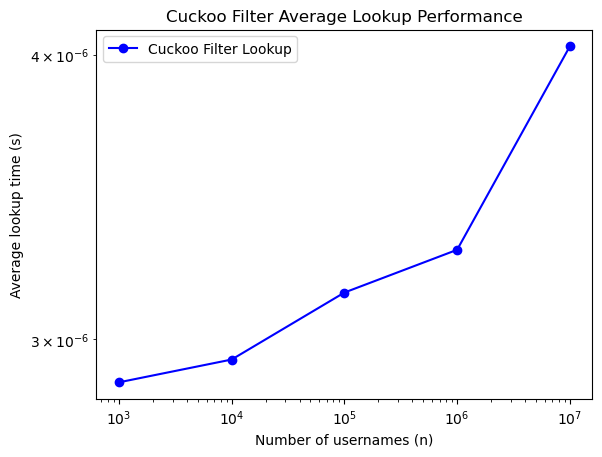

In [ ]:
# import necessary libraries
import hashlib, random, time
from string import ascii_lowercase, digits
import matplotlib.pyplot as plt
from random import sample

# Cuckoo Filter 
class CuckooFilter:
    def __init__(self, bucket_count=10000, bucket_size=2, max_kicks=500):
        # Number of buckets in the filter
        self.bucket_count = bucket_count
        # Number of fingerprint slots per bucket
        self.bucket_size = bucket_size
        # Max number of evictions allowed when inserting
        self.max_kicks = max_kicks
        # Initialize buckets as empty lists
        self.buckets = [[] for _ in range(bucket_count)]

    def _fingerprint(self, item):
        # Create a short fingerprint of the item (fixed-size string)
        # Using SHA-256 then truncating to 8 hex chars
        # (Not secure, but fine for demonstration)
        h = hashlib.sha256(item.encode()).hexdigest()
        return h[:8]

    def _hashes(self, fp):
        # Compute two candidate bucket indices for a fingerprint
        h1 = int(hashlib.sha256(fp.encode()).hexdigest(), 16) % self.bucket_count
        h2 = (h1 ^ int(hashlib.sha256(fp.encode()).hexdigest(), 16)) % self.bucket_count
        return h1, h2

    def insert(self, item):
        # Insert an item by placing its fingerprint into one of two buckets
        fp = self._fingerprint(item)
        i1, i2 = self._hashes(fp)

        # Try direct insert in either candidate bucket
        for i in [i1, i2]:
            if len(self.buckets[i]) < self.bucket_size:
                self.buckets[i].append(fp)
                return True

        # If both are full, perform "kicks" (evictions)
        i = random.choice([i1, i2])
        for _ in range(self.max_kicks):
            # Evict a random fingerprint from bucket i
            j = random.randint(0, self.bucket_size - 1)
            fp, self.buckets[i][j] = self.buckets[i][j], fp  # swap the content of the two buckets

            # Compute alternate index for evicted fingerprint
            i1, i2 = self._hashes(fp)
            i = i2 if i == i1 else i1

            # Try to place evicted fingerprint in alternate bucket
            if len(self.buckets[i]) < self.bucket_size:
                self.buckets[i].append(fp)
                return True

        # If insertion fails after max_kicks, filter is full
        return False

    def lookup(self, item):
        # Lookup checks if fingerprint exists in either candidate bucket
        fp = self._fingerprint(item)
        i1, i2 = self._hashes(fp)
        return fp in self.buckets[i1] or fp in self.buckets[i2]

chars = ascii_lowercase + digits
n_list_cuckoo = [10**3, 10**4, 10**5, 10**6, 10**7]   # test different sizes of n (number of usernames)
times_cuckoo = []  # store average lookup times

for n in n_list_cuckoo:
    # Generate n usernames (random 5 chars + unique index)
    usernames = [''.join(random.choice(chars) for _ in range(5)) + str(i) for i in range(n)]

    # Initialize Cuckoo Filter with 2n buckets and 4 slots each
    cf = CuckooFilter(bucket_count=n*2, bucket_size=4)

    # Insert usernames into the filter
    for name in usernames:
        cf.insert(name)

    # Build lookup test set (half positive, half negative)
    number = 1000  # fixed lookup count
    lookups = min(number//2, len(usernames))       # positive (present) lookups
    negative_samples = number - lookups            # negative (not present) lookups

    lookup_names = []
    lookup_names.extend(sample(usernames, lookups))  # sample existing usernames
    lookup_names.extend([''.join(random.choice(chars) for _ in range(5)) for _ in range(negative_samples)])  # random new

    # Time the lookups
    start = time.perf_counter_ns()
    for name in lookup_names:
        cf.lookup(name)
    total_time = time.perf_counter_ns() - start

    # Compute average lookup time in seconds for one search
    avg_time_sec = (total_time / len(lookup_names)) / 1e9
    times_cuckoo.append(avg_time_sec)

    print(f"n={n}, avg lookup time={avg_time_sec:.9f} s")

# Plot Results of n vs. time
plt.plot(n_list_cuckoo, times_cuckoo, marker="o", color="blue", label="Cuckoo Filter Lookup")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average lookup time (s)")
plt.title("Cuckoo Filter Average Lookup Performance")
plt.legend()
plt.savefig("D:/HAMZA/1.UBC Ok/2-WT1 2025 (Sep-Dec 2025)/COSC 520 - Advanced Algorithms/Assignments/Ass.1 520/COSC-520-Assignment-1/Plots/Cuckoo_Filter.png", dpi=300)
plt.show()

# All together

In [1]:
import matplotlib.pyplot as plt

# Combined comparison plot
plt.figure(figsize=(8,6))

plt.plot(n_list_linear, times_linear, marker="o", label="Linear Search")
plt.plot(n_list_binary, times_binary, marker="s", label="Binary Search")
plt.plot(n_list_hash, times_hash, marker="^", label="Hash Table (MurmurHash3)")
plt.plot(n_list_bloom, times_bloom, marker="D", label="Bloom Filter")
plt.plot(n_list_cuckoo, times_cuckoo, marker="x", label="Cuckoo Filter")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average lookup time (s)")
plt.title("Comparison of Time Complexities in various Data Structures (Lookup)")
plt.legend()
plt.savefig("D:/HAMZA/1.UBC Ok/2-WT1 2025 (Sep-Dec 2025)/COSC 520 - Advanced Algorithms/Assignments/Ass.1 520/COSC-520-Assignment-1/Plots/Comparison of Lookup Time Complexities.png", dpi=300)
plt.show()

NameError: name 'n_list_linear' is not defined

<Figure size 800x600 with 0 Axes>